In [75]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

data=pd.read_csv("http://bit.ly/w-data")
print("Data imported successfully")

Data imported successfully


In [76]:
#Getting insight of Data
data.head()
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [77]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


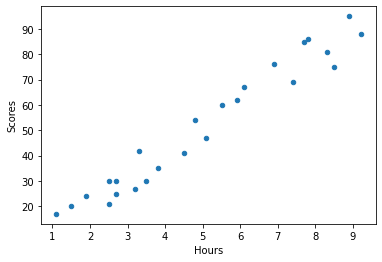

In [78]:
#Plotting data
X=data.iloc[:,0]
y=data.iloc[:,1]
m=len(data)
data.plot.scatter(x="Hours",y="Scores");

In [79]:
# calculating cost function
def cost_function(X,y,theta):
    m=len(y)
    predictions=X.dot(theta)
    square_err=(predictions - y)**2
    return 1/(2*m) * np.sum(square_err)

In [80]:
# Setting up data for cost function
Datan=data.values
m=len(Datan[:,-1])
X=np.append(np.ones((m,1)),Datan[:,0].reshape(m,1),axis=1)
y=Datan[:,1].reshape(m,1)
theta=np.zeros((2,1))
cost_function(X,y,theta)

1632.02

In [81]:
#Calculating gradient descent
def gradientDescent(X,y,theta,alpha,num_iters):
    m=len(y)
    J_history=[]
    for i in range(num_iters):
        predictions = X.dot(theta)
        error = np.dot(X.transpose(),(predictions -y))
        descent=alpha * 1/m * error
        theta-=descent
        J_history.append(cost_function(X,y,theta))
    
    return theta, J_history
theta,J_history = gradientDescent(X,y,theta,0.05,1500)
print("h(x) ="+str(round(theta[0,0],2))+" + "+str(round(theta[1,0],2))+"x1")

h(x) =2.48 + 9.78x1


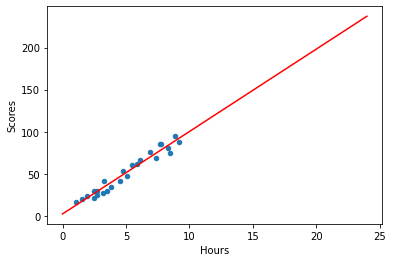

In [82]:
data.plot.scatter(x="Hours",y="Scores");
x_value=[x for x in range(25)]
y_value=[y*theta[1]+theta[0] for y in x_value]
plt.plot(x_value,y_value,color="r")
m=len(data)


In [85]:
def predict(x,theta):
    predictions= np.dot(theta.transpose(),x)
    return predictions[0]
predict1=predict(np.array([1,9.25]),theta)
print("Thus, percentage a student can score if he studies 9.25 hours is "+str(round(predict1,0)))

Thus, percentage a student can score if he studies 9.25 hours is 93.0
